# **Lab: Unstructured Data**

## Exercise 2: Bee versus Ant

In this exercise, we will apply transfer learning on a pre-trained Resnet model with Pytorch for classifying images of bees and ants. We will be working on the Hymenoptera dataset:
https://download.pytorch.org/tutorial/hymenoptera_data.zip

The steps are:
1.   Setup Repository
2.   Load Dataset
3.   Prepare Data
4.   Define Architecture
5.   Train Model
6.   Push Changes


### 1. Setup Repository

**[1.1]** Go inside the created folder `adv_dsi_lab_6`

**[1.2]** Create a new git branch called pytorch_bee_ant

In [ ]:
# Go inside the created folder adv_dsi_lab_6
cd adv_dsi_lab_6

# Create a new git branch called pytorch_bee_ant
git checkout -b pytorch_bee_ant

**[1.3]** Run the built image

**[1.4]** Display last 50 lines of logs
- Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

In [ ]:
# Run the built image
docker run  -dit --rm --name adv_dsi_lab_6 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/adv_dsi/adv_dsi_lab_6:/home/jovyan/work -v ~/Projects/adv_dsi/src:/home/jovyan/work/src -v ~/Projects/adv_dsi/data:/home/jovyan/work/data pytorch-notebook:latest 
                    
#D isplay last 50 lines of logs
docker logs --tail 50 adv_dsi_lab_6

### 2.   Load Dataset

**[2.1]** Import `download_and_extract_archive` from `torchvision.datasets.utils`

**[2.2]** Create 2 variables called `url` and `path` that will contain respectively the link to the dataset and the path to `data/raw` folder

**[2.3]** Dowload and extract the dataset with `download_and_extract_archive`

In [3]:
# Import download_and_extract_archive from torchvision.datasets.utils
from torchvision.datasets.utils import download_and_extract_archive

# Variables called url and path that will contain respectively the link to the dataset and the path to data/raw folder
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
path = '~/work/data/raw/'

# Dowload and extract the dataset with download_and_extract_archive
download_and_extract_archive(url, path)


Extracting /home/jovyan/work/data/raw/hymenoptera_data.zip to /home/jovyan/work/data/raw/


**[2.4]** Import torchvision

**[2.5]** Define a transformation pipeline that will convert crop the images to get a size of 224*224, transform them into tensors and normalise them


In [5]:
# Import torchvision
import torchvision

transform = torchvision.transforms.Compose([
        torchvision.transforms.CenterCrop(size=224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

**[2.6]** Import `ImageFolder` from `torchvision.datasets`

**[2.7]** Instantiate 2 separate `ImageFolder()` called `train_data` and `test_data` with the path to their respective folders and the transformation pipeline

In [6]:
# Import ImageFolder from torchvision.datasets
from torchvision.datasets import ImageFolder

# Instantiate 2 separate ImageFolder() called train_data and test_data with the path to their respective folders and the transformation pipeline
train_data = ImageFolder('../data/raw/hymenoptera_data/train', transform=transform) 
test_data = ImageFolder('../data/raw/hymenoptera_data/val', transform=transform) 

### 3. Prepare Data

**[3.1]** Import torch

**[3.2]** Create a variable called `batch_size` with the value 16

**[3.3]** Import DataLoader from torch.utils.data

**[3.4]** Instantiate a `torch.utils.data.DataLoader()` on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called `train_loader`

**[3.5]** Instantiate a `torch.utils.data.DataLoader()` on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called `test_loader`

In [8]:
# Import torch
import torch

# Create a variable called batch_size with the value 16
batch_size = 16

# Import DataLoader from torch.utils.data
from torch.utils.data import DataLoader

# Instantiate a torch.utils.data.DataLoader() on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called train_loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Instantiate a torch.utils.data.DataLoader() on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called test_loader
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

**[3.6]** Create a generator on the test data loader and extract the first observation

**[3.7]** Print the dimensions of the first image

**[3.8]** Import matplotlib.pyplot as plt

**[3.9]** Print the first image with its corresponding target

Text(0.5, 1.0, 'Ground Truth: 1')

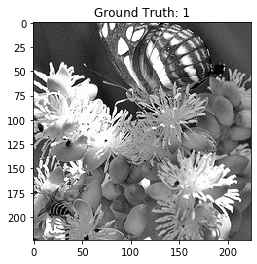

In [9]:
# Create a generator on the test data loader and extract the first observation
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Print the dimensions of the first image
example_data.shape

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Print the first image with its corresponding target
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets[0]))

### 4. Define Architecture

**[4.1]** Import models from torchvision

**[4.2]** Instantiate a pre-trained `models.resnet50()` and save it into a variable called `model` 

**[4.3]** Print the architecture of this model

In [10]:
# Import models from torchvision
from torchvision import models

# Instantiate a pre-trained models.resnet50() and save it into a variable called model
model = models.resnet50(pretrained=True)

# Print the architecture of this model
model

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**[4.4]** Create a for lopp that will iterate through the model's parameters and set them as non-trainable

**[4.5]** Create a variable called `n_inputs` that will contains the number of neurons of the `fc` layer

**[4.6]** Import torch.nn as nn



In [11]:
# Create a for lopp that will iterate through the model's parameters and set them as non-trainable
for param in model.parameters():
    param.requires_grad = False
    
# Create a variable called n_inputs that will contains the number of neurons of the fc layer
n_inputs = model.fc.in_features

# Import torch.nn as nn
import torch.nn as nn

**[4.7]** Replace the `fc` layer by:
- fully-connected layer of 256 neurons with relu and dropout of 0.4
- fully-connected layer of 1 neurons with sigmoid

In [12]:
# Replace the `fc` layer
model.fc = nn.Sequential(
    nn.Linear(n_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 1),
    nn.Sigmoid()
)

**[4.8]** Import the `get_device` function from src.models.pytorch 

**[4.9]** Get the device available and set to the model to use it

In [13]:
# Import the get_device function from src.models.pytorch
from src.models.pytorch import get_device

# Get the device available and set to the model to use it
device = get_device()
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 5. Train the model

**[5.1]** Import train_binary and test_binary from src.models.pytorch

**[5.2]** Instantiate a `nn.BCELoss()` and save it into a variable called `criterion`

**[5.3]** Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called optimizer

In [14]:
# Import train_binary and test_binary from src.models.pytorch
from src.models.pytorch import train_binary, test_binary

# Instantiate a nn.BCELoss() and save it into a variable called criterion
criterion = nn.BCELoss()

# Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate 
# and save it into a variable called optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**[5.4]** Create 2 variables called `N_EPOCHS` and `BATCH_SIZE` that will respectively take the values 50 and 32

**[5.5]** Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print their scores

In [15]:
# Variables called N_EPOCHS and BATCH_SIZE that will respectively take the values 50 and 32
N_EPOCHS = 5
BATCH_SIZE = 32

# Create a for loop that will iterate through the specified number of epochs and will train the model 
# with the training set and assess the performance on the validation set and print their scores
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_binary(train_data, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_binary(test_data, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.4f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.4f}%')

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0
	(train)	|	Loss: 0.0192	|	Acc: 50.4098%
	(valid)	|	Loss: 0.0156	|	Acc: 45.7516%
Epoch: 1
	(train)	|	Loss: 0.0107	|	Acc: 50.4098%
	(valid)	|	Loss: 0.0060	|	Acc: 45.7516%
Epoch: 2
	(train)	|	Loss: 0.0064	|	Acc: 50.4098%
	(valid)	|	Loss: 0.0050	|	Acc: 45.7516%
Epoch: 3
	(train)	|	Loss: 0.0054	|	Acc: 50.4098%
	(valid)	|	Loss: 0.0047	|	Acc: 45.7516%
Epoch: 4
	(train)	|	Loss: 0.0042	|	Acc: 50.4098%
	(valid)	|	Loss: 0.0053	|	Acc: 45.7516%


**[5.6]** Save the model into the `models` folder

In [16]:
# Save the model into the models folder
torch.save(model, "../models/pytorch_mnist_cnn.pt")

### 6.   Push changes

**[6.1]** Add you changes to git staging area

**[6.2]** Create the snapshot of your repository and add a description

**[6.3]** Push your snapshot to Github

**[6.4]** Check out to the master branch

**[6.5]** Pull the latest updates

**[6.6]** Check out to the `pytorch_mnist` branch

**[6.7]** Merge the `master` branch and push your changes

**[6.8]** Go to Github and merge the branch after reviewing the code and fixing any conflict

In [ ]:
"""
# Add you changes to git staging area
git add .

# Create the snapshot of your repository and add a description
git commit -m "pytorch pytorch resnet"

# Push your snapshot to Github
git push https://<insert_pat>@github.com/CazMayhem/adv_dsi_lab_6.git

# Check out to the master branch
git checkout master

# Pull the latest updates
git pull https://<insert_pat>@github.com/CazMayhem/adv_dsi_lab_5.git

# Check out to the pytorch_mnist branch
git checkout pytorch_bee_ant

# erge the master branch and push your changes
git merge master
git push https://<insert_pat>@github.com/CazMayhem/adv_dsi_lab_6.git

# Now go to Github and merge the branch after reviewing the code and fixing any conflict

"""

**[6.9]** Stop the Docker container

In [ ]:
# Stop the Docker container
docker stop adv_dsi_lab_6